In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import signal
import IPython.display as ipd
import librosa
import pandas as pd
from scipy import signal

In [3]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player

    Args:
        x: Input signal
        Fs: Sampling rate of x
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    fig = plt.figure(figsize=(8, 2))
    ax = fig.add_subplot(111)
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

In [4]:
def print_plot_play_with_label(x, Fs, label, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player

    Args:
        x: Input signal
        Fs: Sampling rate of x
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    fig = plt.figure(figsize=(8, 2))
    ax = fig.add_subplot(111)
    start_y = min(x)
    heigh_y = max(x) - min(x)
    for i in range(len(label)):
        start_x = label[i,0] * Fs
        width_x = (label[i,1] -  label[i,0]) * Fs
        rect = Rectangle((start_x,start_y),width_x,heigh_y,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

knuckle Fs = 48000, x.shape = (223488,), x.dtype = float32


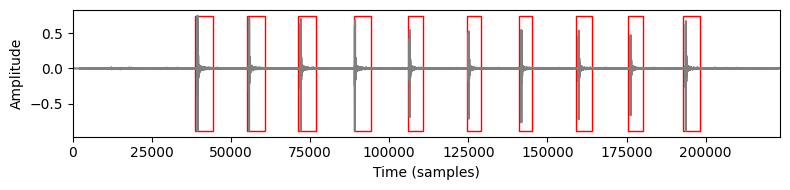

pad Fs = 48000, x.shape = (189964,), x.dtype = float32


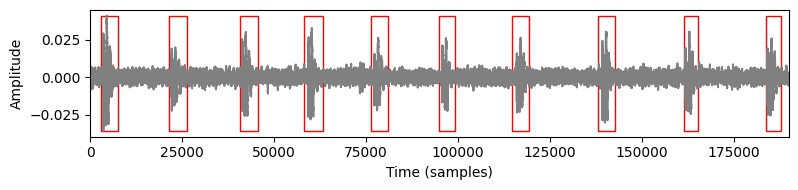

nail Fs = 48000, x.shape = (165832,), x.dtype = float32


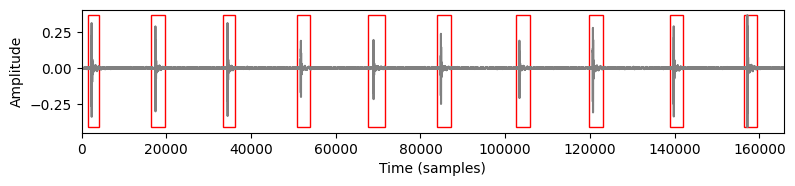

In [6]:
#Read data from audio files and label files

# Read audio files
# knuckle_file = "./recorded_dataset-shamika/Knuckle.mp3"
# nail_file = "./recorded_dataset-shamika/Finger nail tip tap.mp3"
# pad_file = "./audio_file/pad.wav"
knuckle_file = "./audio_file/knuckle.wav"
pad_file = "./audio_file/pad.wav"
nail_file = "./audio_file/nail.wav"

knuclke_raw, Fs = librosa.load(knuckle_file, sr=None)
pad_raw, Fs = librosa.load(pad_file, sr=None)
nail_raw, Fs = librosa.load(nail_file, sr=None)

# Read label files generated from the Audacity software
# knckle_label_file = "./recorded_dataset-shamika/Knuckle.txt"
# pad_label_file = "./recorded_dataset-shamika/4 finger tap.txt"
# nail_label_file = "./recorded_dataset-shamika/Finger nail tip tap.txt"
knckle_label_file = "./audio_file/knuckle.txt"
pad_label_file = "./audio_file/pad.txt"
nail_label_file = "./audio_file/nail.txt"

knckle_label = np.loadtxt(knckle_label_file, delimiter='\t', skiprows=0)
pad_label = np.loadtxt(pad_label_file, delimiter='\t', skiprows=0)
nail_label = np.loadtxt(nail_label_file, delimiter='\t', skiprows=0)

print_plot_play_with_label(knuclke_raw, Fs,knckle_label, text='knuckle')
print_plot_play_with_label(pad_raw, Fs, pad_label, text='pad')
print_plot_play_with_label(nail_raw, Fs, nail_label, text='nail')

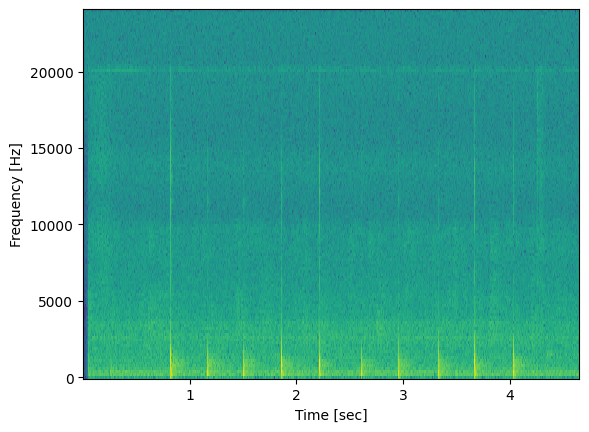

In [7]:
f, t, Sxx = signal.spectrogram(knuclke_raw, Fs)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

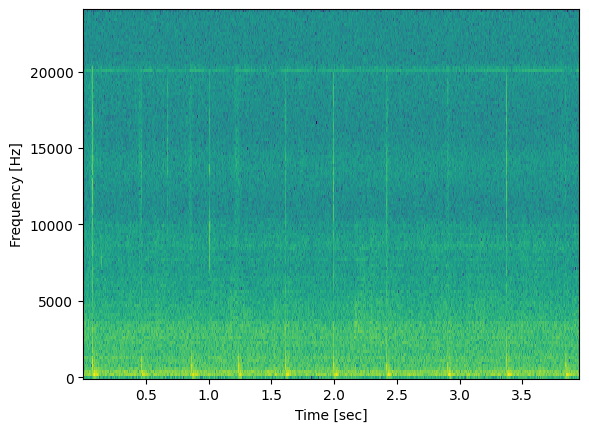

In [8]:
f, t, Sxx = signal.spectrogram(pad_raw, Fs)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

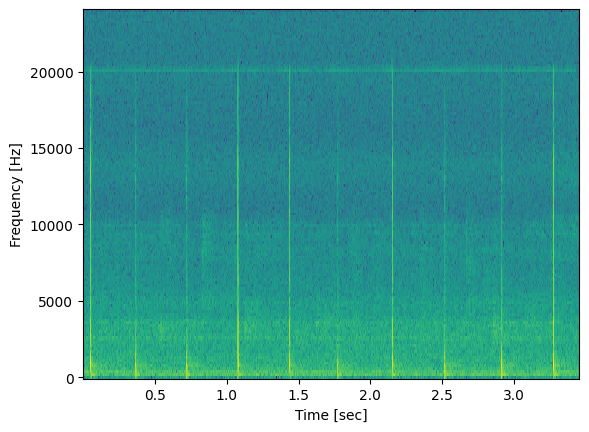

In [9]:
f, t, Sxx = signal.spectrogram(nail_raw, Fs)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [10]:
# Develop a auto segmentation method
# Step 1: get manually segmented data samples
# Step 2: feature engineering
# Step 3: build the program for auto segmentation
# Step 4: test the performance

In [11]:
# Step 1: get manually segmented data samples
knuckle_samples = []
for i in range(len(knckle_label)):
    start_index = int(knckle_label[i,0] * Fs)
    end_index = int(knckle_label[i,1] * Fs)
    knuckle_samples.append(knuclke_raw[start_index:end_index])

pad_samples = []
for i in range(len(pad_label)):
    start_index = int(pad_label[i,0] * Fs)
    end_index = int(pad_label[i,1] * Fs)
    pad_samples.append(pad_raw[start_index:end_index])

nail_samples = []
for i in range(len(nail_label)):
    start_index = int(nail_label[i,0] * Fs)
    end_index = int(nail_label[i,1] * Fs)
    nail_samples.append(nail_raw[start_index:end_index])


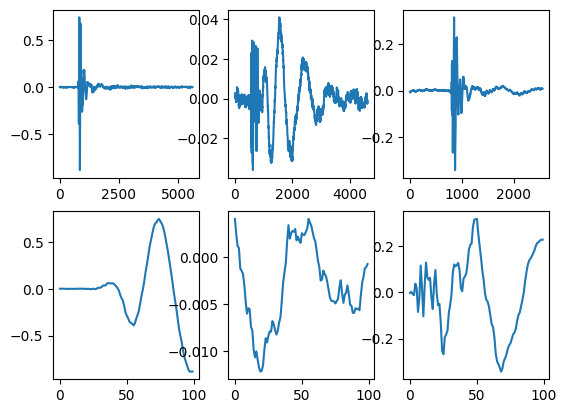

In [12]:
# Step 2: feature engineering
plt.subplot(2,3,1)
plt.plot(knuckle_samples[0])
plt.subplot(2,3,4)
plt.plot(knuckle_samples[0][750:850])

plt.subplot(2,3,2)
plt.plot(pad_samples[0])
plt.subplot(2,3,5)
plt.plot(pad_samples[0][800:900])

plt.subplot(2,3,3)
plt.plot(nail_samples[0])
plt.subplot(2,3,6)
plt.plot(nail_samples[0][800:900])


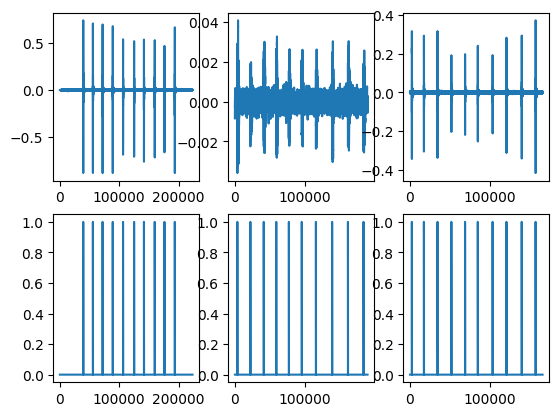

In [13]:
# Step 3: build the program for auto segmentation
plt.subplot(2,3,1)
plt.plot(knuclke_raw)

plt.subplot(2,3,2)
plt.plot(pad_raw)

plt.subplot(2,3,3)
plt.plot(nail_raw)

def identify_edge_index(data, thresh):
    data_size = len(data)
    temp = np.zeros(data_size)
    res = np.zeros(data_size)
    res_index = []
    start = 10
    for i in range(start,data_size):
        if data[i] - data[i-start] > thresh:
            temp[i] = 1
        else:
            temp[i] = 0

        if i > 350 and temp[i] == 1 and sum(temp[i-350: i]) == 0:
            res[i] = 1
            res_index.append(i)
        else:
            res[i] = 0

    return res,res_index

seg_knuckle, seg_index_knuckle = identify_edge_index(knuclke_raw,0.2)

plt.subplot(2,3,4)
plt.plot(seg_knuckle)

seg_pad, seg_index_pad = identify_edge_index(pad_raw,0.012)
plt.subplot(2,3,5)
plt.plot(seg_pad)
seg_nail, seg_index_nail = identify_edge_index(nail_raw,0.12)
plt.subplot(2,3,6)
plt.plot(seg_nail)
plt.show()


In [14]:
# Step 2: Sample length
# We would using a moving window for event detection
# get the average windows length
knuckle_sample_len = ((knckle_label[:,1] -  knckle_label[:,0]) * Fs).astype(int)
pad_sample_len = ((pad_label[:,1] -  pad_label[:,0]) * Fs).astype(int)
nail_sample_len = ((nail_label[:,1] -  nail_label[:,0]) * Fs).astype(int)
print(np.mean(knuckle_sample_len))
print(np.mean(pad_sample_len))
print(np.mean(nail_sample_len))

5094.9
4556.3
3175.9


Sample - 0


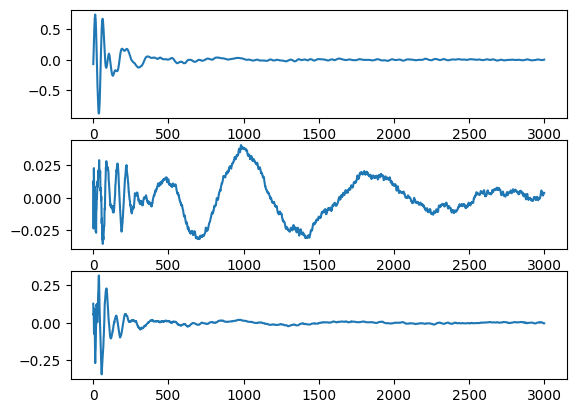

In [15]:
# Show some results
window_len = 3000

#get the average energy of the raw signal
#Segment samples
knuckle_sample = knuclke_raw[seg_index_knuckle[0]:(seg_index_knuckle[0] + window_len)]
pad_sample = pad_raw[seg_index_pad[0]:(seg_index_pad[0] + window_len)]
nail_sample = nail_raw[seg_index_nail[0]:(seg_index_nail[0] + window_len)]

print("Sample - {0}".format(0))
plt.subplot(3,1,1)
plt.plot(knuckle_sample)

plt.subplot(3,1,2)
plt.plot(pad_sample)

plt.subplot(3,1,3)
plt.plot(nail_sample)

plt.show()

In [16]:
# Classification
# Step 1: feature engineering
# Step 2: build the classifier
# Step 3: evaluation

Detected segments - knuckle: 10, pad: 10, nail: 10
Sample - 0


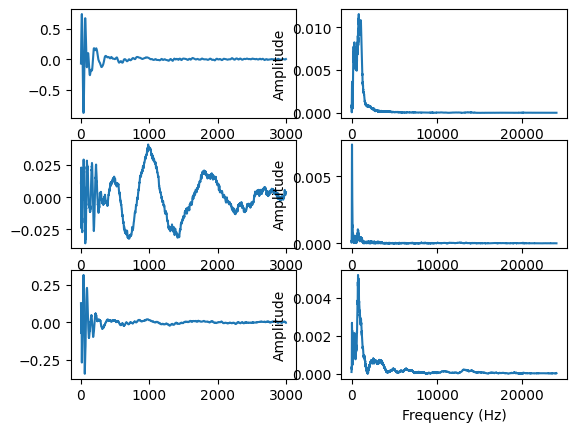

Sample - 1


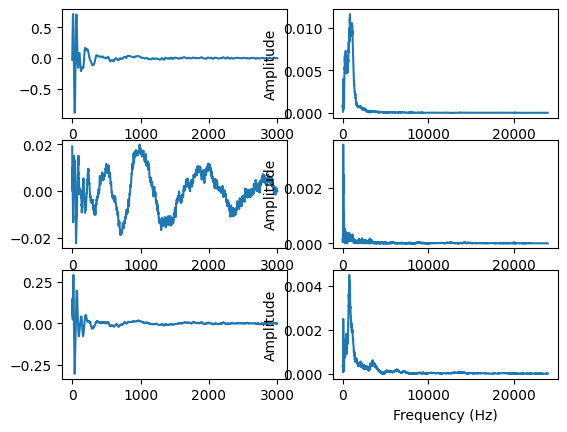

Sample - 2


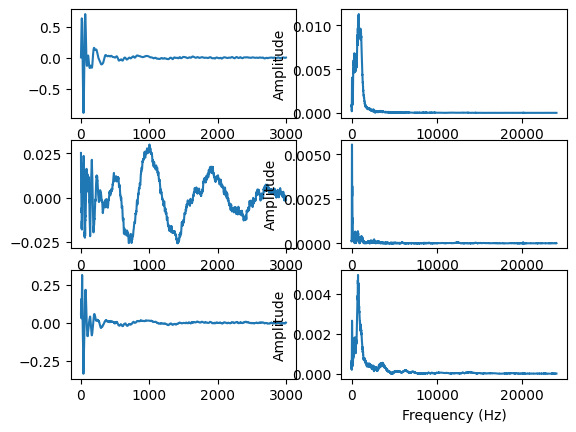

Sample - 3


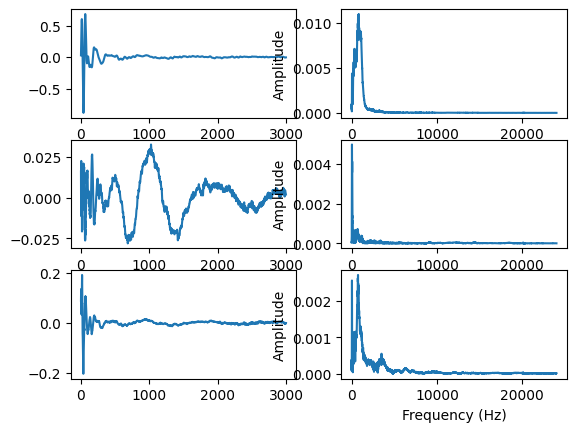

Sample - 4


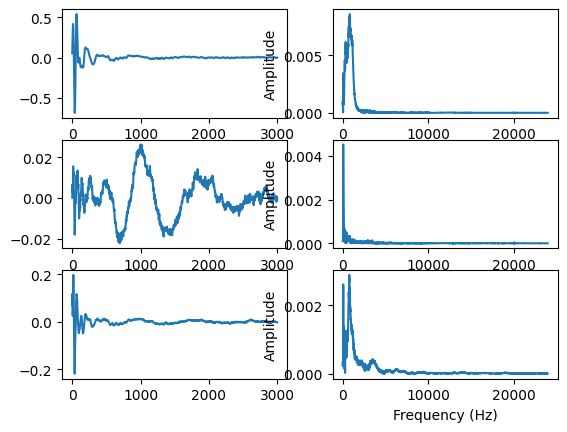

Sample - 5


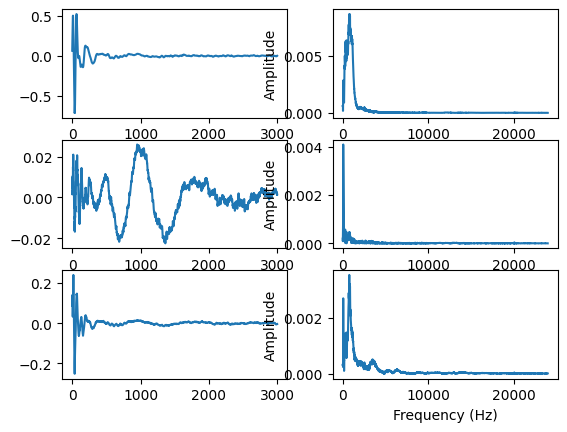

Sample - 6


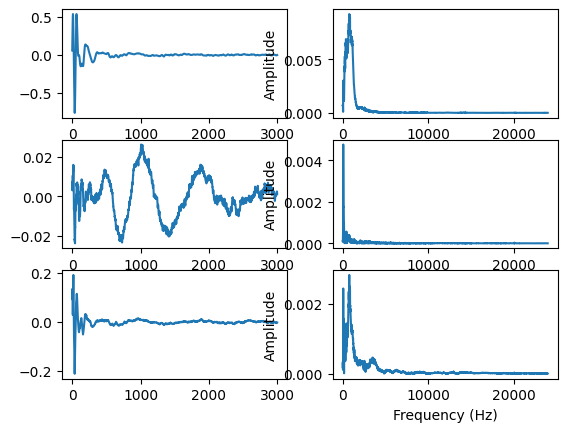

Sample - 7


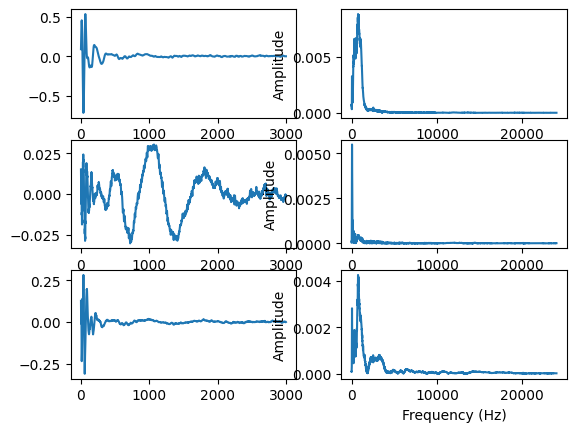

Sample - 8


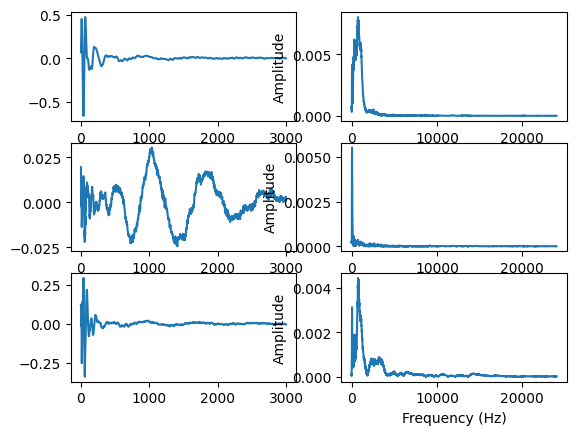

Sample - 9


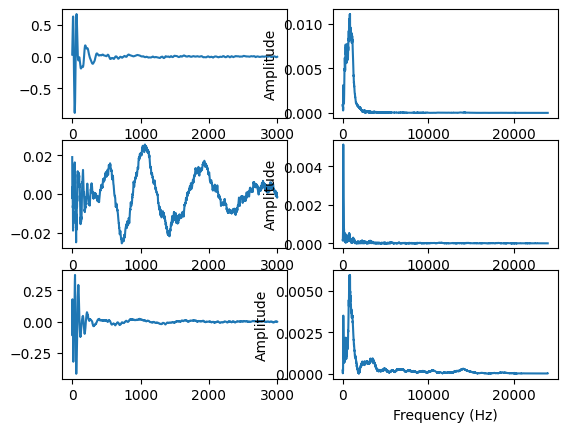

In [17]:
# FFT features of all samples
window_len = 3000
knuckle_sample_array = []
pad_sample_array = []
nail_sample_array = []

# print counts for debug
print("Detected segments - knuckle: {}, pad: {}, nail: {}".format(
    len(seg_index_knuckle), len(seg_index_pad), len(seg_index_nail)
))

# iterate only up to the shortest list to avoid IndexError
num_samples = min(len(seg_index_knuckle), len(seg_index_pad), len(seg_index_nail))
for i in range(num_samples):
    # extract start and end indices, clamp to signal length
    k_start = seg_index_knuckle[i]
    p_start = seg_index_pad[i]
    n_start = seg_index_nail[i]

    k_end = min(k_start + window_len, len(knuclke_raw))
    p_end = min(p_start + window_len, len(pad_raw))
    n_end = min(n_start + window_len, len(nail_raw))

    knuckle_sample = knuclke_raw[k_start:k_end]
    pad_sample = pad_raw[p_start:p_end]
    nail_sample = nail_raw[n_start:n_end]

    # if a segment is shorter than window_len, pad with zeros so FFT length is consistent
    if len(knuckle_sample) < window_len:
        knuckle_sample = np.pad(knuckle_sample, (0, window_len - len(knuckle_sample)), mode='constant')
    if len(pad_sample) < window_len:
        pad_sample = np.pad(pad_sample, (0, window_len - len(pad_sample)), mode='constant')
    if len(nail_sample) < window_len:
        nail_sample = np.pad(nail_sample, (0, window_len - len(nail_sample)), mode='constant')

    print("Sample - {0}".format(i))
    plt.subplot(3,2,1)
    plt.plot(knuckle_sample)

    plt.subplot(3,2,3)
    plt.plot(pad_sample)

    plt.subplot(3,2,5)
    plt.plot(nail_sample)

    plt.subplot(3,2,2)
    fft_len = len(knuckle_sample)
    sp = np.fft.fft(knuckle_sample, Fs)
    fft_values = sp[range(int(Fs/2))]
    fft_power = abs(fft_values) / len(knuckle_sample)
    x_label = range(int(Fs/2))
    ax = plt.plot(x_label, fft_power)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    knuckle_sample_array.append(fft_power[0:9999].tolist())

    plt.subplot(3,2,4)
    fft_len = len(pad_sample)
    sp = np.fft.fft(pad_sample, Fs)
    fft_values = sp[range(int(Fs/2))]
    fft_power = abs(fft_values) / len(pad_sample)
    x_label = range(int(Fs/2))
    ax = plt.plot(x_label, fft_power)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    pad_sample_array.append(fft_power[0:9999].tolist())


    plt.subplot(3,2,6)
    fft_len = len(nail_sample)
    sp = np.fft.fft(nail_sample, Fs)
    fft_values = sp[range(int(Fs/2))]
    fft_power = abs(fft_values) / len(nail_sample)
    x_label = range(int(Fs/2))
    ax = plt.plot(x_label, fft_power)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    nail_sample_array.append(fft_power[0:9999].tolist())
    plt.show()

In [18]:
# Build the classifier
# Method-1: the rule way
# This is your homework - 1

## Method 1: Rule-based classifier via spectral template matching

This baseline uses **template matching in the frequency domain**.  
Each gesture is represented by the magnitude of its FFT, and a single **template** (prototype spectrum) is computed per gesture from the training set. A new sample is classified as the gesture whose template is most similar to its spectrum.

### 1) Feature representation
For each segmented audio tap, we compute the FFT magnitude vector:

$$
x = |\mathrm{FFT}(s)| \in \mathbb{R}^d
$$

where $s$ is the 1-D audio segment and $d$ is the number of frequency bins kept.

### 2) Build gesture templates (class prototypes)
For each gesture class $g \in \{\text{knuckle}, \text{pad}, \text{nail}\}$, we form a template by averaging all training spectra of that class:

$$
\mu_g = \frac{1}{N_g}\sum_{i=1}^{N_g} x_i^{(g)}
$$

where $N_g$ is the number of training samples for gesture $g$.

### 3) Similarity measure (cosine similarity)
Given a new sample spectrum $x$, we compute cosine similarity to each template:

$$
\mathrm{cos}(x,\mu_g) =
\frac{x^\top \mu_g}{\|x\|\;\|\mu_g\| + \varepsilon}
$$

with a small $\varepsilon$ (e.g., $10^{-8}$) to avoid division by zero.

### 4) Decision rule
We assign the label of the template with the highest similarity:

$$
\hat{y} = \arg\max_{g}\; \mathrm{cos}(x,\mu_g)
$$

Intuitively, the classifier predicts the gesture whose **average spectral fingerprint** best matches the incoming tap.

This method is fully deterministic: no learned model parameters beyond the per-class mean spectra.


In [19]:
# ---------- Method-1: Rule-based classifier (template matching) ----------

import numpy as np
from sklearn.metrics import accuracy_score

# Build train feature matrix and labels from the FFT features
X_train = np.array(
    knuckle_sample_array + pad_sample_array + nail_sample_array
)
y_train = np.array(
    [0] * len(knuckle_sample_array)
    + [1] * len(pad_sample_array)
    + [2] * len(nail_sample_array)
)

label_names = {0: "knuckle", 1: "pad", 2: "nail"}

# Class "templates" = average spectrum per gesture
knuckle_template = np.mean(np.vstack(knuckle_sample_array), axis=0)
pad_template     = np.mean(np.vstack(pad_sample_array), axis=0)
nail_template    = np.mean(np.vstack(nail_sample_array), axis=0)

def cosine_sim(a, b, eps=1e-8):
    a = np.asarray(a)
    b = np.asarray(b)
    return float(np.dot(a, b) / ((np.linalg.norm(a) * np.linalg.norm(b)) + eps))

def rule_based_predict_one(x_fft):
    sims = [
        cosine_sim(x_fft, knuckle_template),
        cosine_sim(x_fft, pad_template),
        cosine_sim(x_fft, nail_template),
    ]
    return int(np.argmax(sims))   # 0 / 1 / 2

def rule_based_predict(X):
    return np.array([rule_based_predict_one(x) for x in X])

# Sanity check on the training set
rb_train_pred = rule_based_predict(X_train)
print("Rule-based TRAIN accuracy:", accuracy_score(y_train, rb_train_pred))


Rule-based TRAIN accuracy: 1.0


In [20]:
# # Method-2: the ML way
# # This is your homework - 1
# from sklearn import svm
# X = knuckle_sample_array[0:-1]
# X.extend(pad_sample_array[0:-1])
# X.extend(nail_sample_array[0:-1])

# y = [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2]
# clf = svm.SVC()
# clf.fit(X, y)


## Method-2: the ML way (k-NN instead of SVM)

In [21]:
# Method-2: the ML way (k-NN instead of SVM)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reuse X_train, y_train defined in Method-1
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.3,
    random_state=42,
    stratify=y_train,
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr, y_tr)

y_val_pred = knn.predict(X_val)
print("kNN VALIDATION accuracy:", accuracy_score(y_val, y_val_pred))
print("kNN validation confusion matrix:\n", confusion_matrix(y_val, y_val_pred))
print("kNN validation classification report:\n",
      classification_report(y_val, y_val_pred, target_names=[label_names[i] for i in range(3)]))


kNN VALIDATION accuracy: 1.0
kNN validation confusion matrix:
 [[3 0 0]
 [0 3 0]
 [0 0 3]]
kNN validation classification report:
               precision    recall  f1-score   support

     knuckle       1.00      1.00      1.00         3
         pad       1.00      1.00      1.00         3
        nail       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



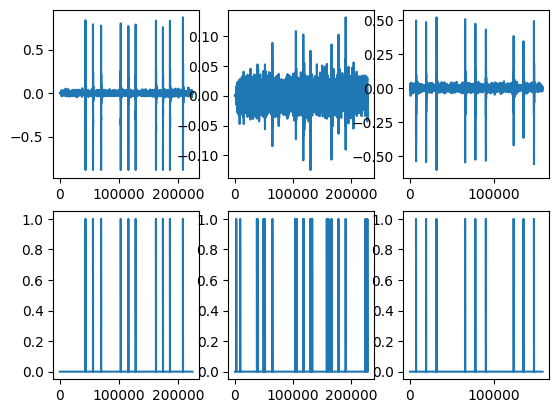

In [22]:
# Step 4: evaluate on another audio files
knuckle_test_file = "./audio_file/knuckle-test.wav"
pad_test_file = "./audio_file/pad-test.wav"
nail_test_file = "./audio_file/nail-test-2.wav"

knuclke_test_raw, Fs = librosa.load(knuckle_test_file, sr=None)
pad_test_raw, Fs = librosa.load(pad_test_file, sr=None)
nail_test_raw, Fs = librosa.load(nail_test_file, sr=None)

#print_plot_play(knuclke_raw, Fs, text='knuckle')
#print_plot_play(pad_raw, Fs, text='pad')
#print_plot_play(nail_raw, Fs, text='nail')

plt.subplot(2,3,1)
plt.plot(knuclke_test_raw)

plt.subplot(2,3,2)
plt.plot(pad_test_raw)

plt.subplot(2,3,3)
plt.plot(nail_test_raw)

def identify_edge_index(data, thresh):
    data_size = len(data)
    temp = np.zeros(data_size)
    res = np.zeros(data_size)
    res_index = []
    start = 10
    for i in range(start,data_size):
        if data[i] - data[i-start] > thresh:
            temp[i] = 1
        else:
            temp[i] = 0

        if i > 350 and temp[i] == 1 and sum(temp[i-350: i]) == 0:
            res[i] = 1
            res_index.append(i)
        else:
            res[i] = 0

    return res,res_index

seg_knuckle_test, seg_index_knuckle_test = identify_edge_index(knuclke_test_raw,0.1)
plt.subplot(2,3,4)
plt.plot(seg_knuckle_test)

seg_pad_test, seg_index_pad_test = identify_edge_index(pad_test_raw,0.012)
plt.subplot(2,3,5)
plt.plot(seg_pad_test)

seg_nail_test, seg_index_nail_test = identify_edge_index(nail_test_raw,0.12)
plt.subplot(2,3,6)
plt.plot(seg_nail_test)
plt.show()

Sample - 0


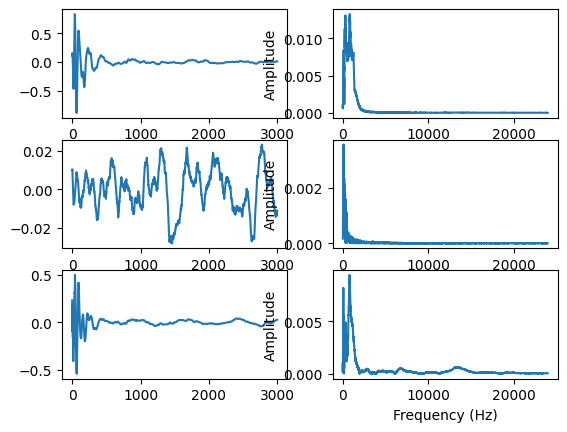

Sample - 1


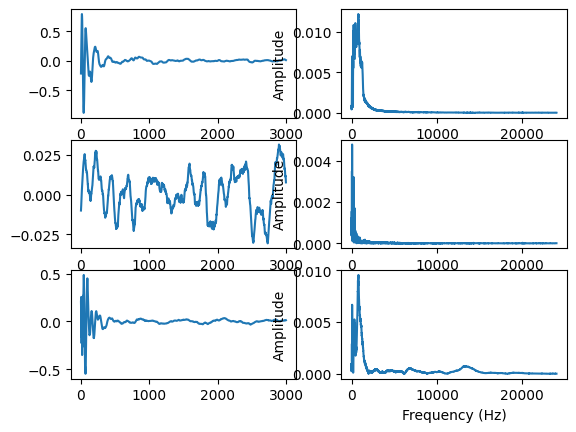

Sample - 2


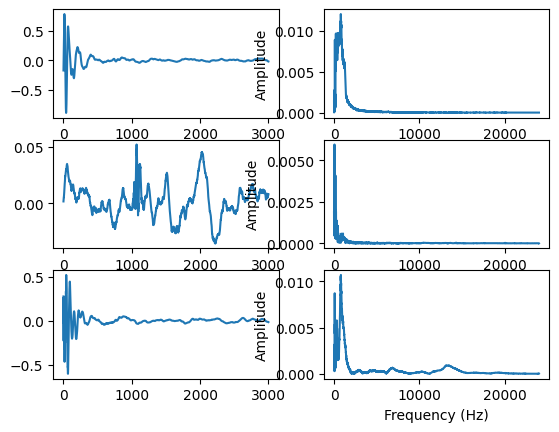

Sample - 3


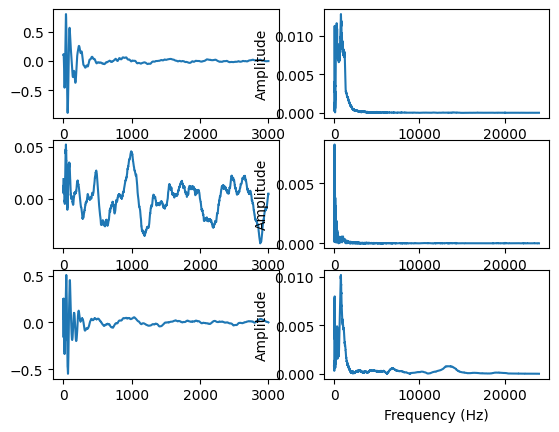

Sample - 4


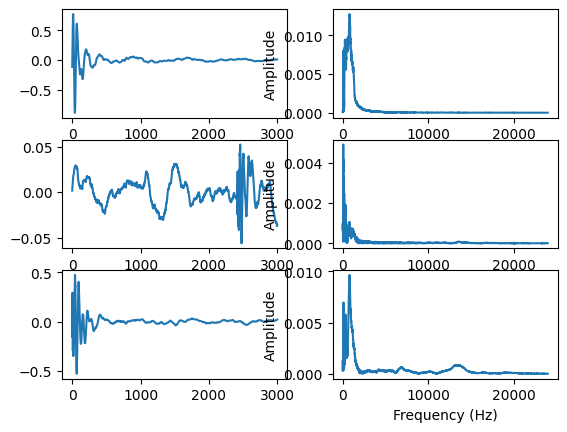

Sample - 5


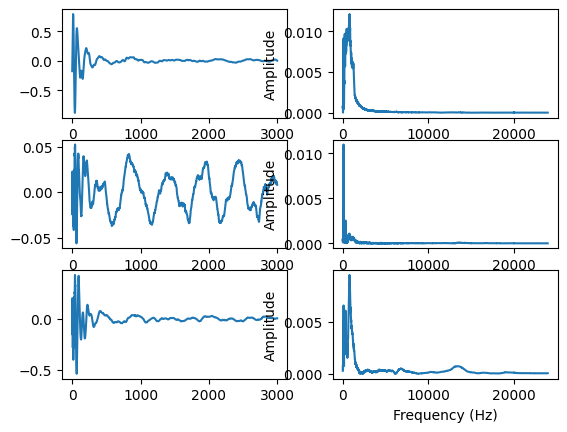

Sample - 6


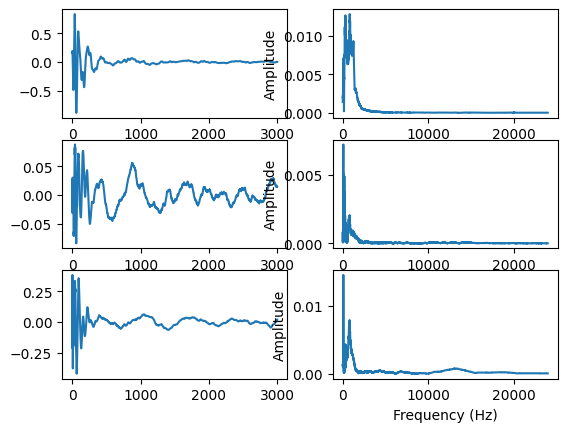

Sample - 7


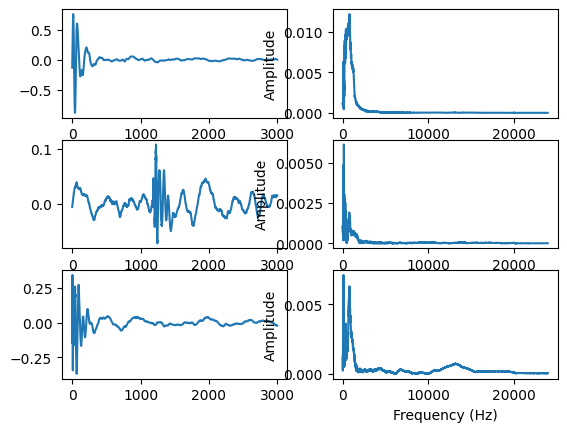

Sample - 8


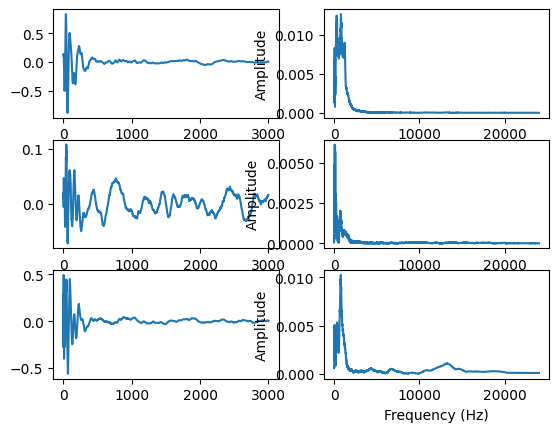

In [23]:
# FFT features of all samples
window_len = 3000
knuckle_sample_array_test = []
pad_sample_array_test = []
nail_sample_array_test = []

for i in range(len(seg_index_nail_test)):
    knuckle_sample = knuclke_test_raw[seg_index_knuckle_test[i]:(seg_index_knuckle_test[i] + window_len)]
    pad_sample = pad_test_raw[seg_index_pad_test[i]:(seg_index_pad_test[i] + window_len)]
    nail_sample = nail_test_raw[seg_index_nail_test[i]:(seg_index_nail_test[i] + window_len)]

    print("Sample - {0}".format(i))
    plt.subplot(3,2,1)
    plt.plot(knuckle_sample)

    plt.subplot(3,2,3)
    plt.plot(pad_sample)

    plt.subplot(3,2,5)
    plt.plot(nail_sample)

    plt.subplot(3,2,2)
    fft_len = len(knuckle_sample)
    sp = np.fft.fft(knuckle_sample,Fs)
    fft_values = sp[range(int(Fs/2))]
    fft_power = abs(fft_values)/len(knuckle_sample)
    x_label = range(int(Fs/2))
    ax = plt.plot(x_label,fft_power)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    knuckle_sample_array_test.append(fft_power[0:9999].tolist())

    plt.subplot(3,2,4)
    fft_len = len(pad_sample)
    sp = np.fft.fft(pad_sample,Fs)
    fft_values = sp[range(int(Fs/2))]
    fft_power = abs(fft_values)/len(pad_sample)
    x_label = range(int(Fs/2))
    ax = plt.plot(x_label,fft_power)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    pad_sample_array_test.append(fft_power[0:9999].tolist())


    plt.subplot(3,2,6)
    fft_len = len(nail_sample)
    sp = np.fft.fft(nail_sample,Fs)
    fft_values = sp[range(int(Fs/2))]
    fft_power = abs(fft_values)/len(nail_sample)
    x_label = range(int(Fs/2))
    ax = plt.plot(x_label,fft_power)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    nail_sample_array_test.append(fft_power[0:9999].tolist())
    plt.show()

In [24]:
# clf.predict(nail_sample_array_test)

In [25]:
# ---------- Evaluate both methods on the TEST audio ----------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_test = np.array(
    knuckle_sample_array_test
    + pad_sample_array_test
    + nail_sample_array_test
)
y_test = np.array(
    [0] * len(knuckle_sample_array_test)
    + [1] * len(pad_sample_array_test)
    + [2] * len(nail_sample_array_test)
)

print("Test X shape:", X_test.shape)
print("Test y shape:", y_test.shape)

# Rule-based method
rb_test_pred = rule_based_predict(X_test)
print("\nRule-based TEST accuracy:", accuracy_score(y_test, rb_test_pred))
print("Rule-based confusion matrix:\n", confusion_matrix(y_test, rb_test_pred))
print("Rule-based classification report:\n",
      classification_report(y_test, rb_test_pred, target_names=[label_names[i] for i in range(3)]))

# k-NN method
knn_test_pred = knn.predict(X_test)
print("\nkNN TEST accuracy:", accuracy_score(y_test, knn_test_pred))
print("kNN confusion matrix:\n", confusion_matrix(y_test, knn_test_pred))
print("kNN classification report:\n",
      classification_report(y_test, knn_test_pred, target_names=[label_names[i] for i in range(3)]))


Test X shape: (27, 9999)
Test y shape: (27,)

Rule-based TEST accuracy: 1.0
Rule-based confusion matrix:
 [[9 0 0]
 [0 9 0]
 [0 0 9]]
Rule-based classification report:
               precision    recall  f1-score   support

     knuckle       1.00      1.00      1.00         9
         pad       1.00      1.00      1.00         9
        nail       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27


kNN TEST accuracy: 0.7407407407407407
kNN confusion matrix:
 [[9 0 0]
 [0 9 0]
 [7 0 2]]
kNN classification report:
               precision    recall  f1-score   support

     knuckle       0.56      1.00      0.72         9
         pad       1.00      1.00      1.00         9
        nail       1.00      0.22      0.36         9

    accuracy                           0.74        27
   macro avg       0.85      0.74      0.69        27
weight

# Dataset Size Exploration

This section explores how the size of the training dataset affects the performance of both classifiers.

In [26]:
# Setup for dataset size exploration
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("="*60)
print("EXPLORING EFFECT OF DATASET SIZE ON PERFORMANCE")
print("="*60)

EXPLORING EFFECT OF DATASET SIZE ON PERFORMANCE


In [27]:
# Build complete feature matrix from training data
X_full = np.array(knuckle_sample_array + pad_sample_array + nail_sample_array)
y_full = np.array(
    [0] * len(knuckle_sample_array) + 
    [1] * len(pad_sample_array) + 
    [2] * len(nail_sample_array)
)

print(f"Total training samples: {len(X_full)}")
print(f"Feature dimensions: {X_full.shape[1]}")
print(f"Test samples: {len(X_test)}")

Total training samples: 30
Feature dimensions: 9999
Test samples: 27


In [28]:
# Define dataset size percentages to test
dataset_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Store results
rule_based_train_acc = []
rule_based_test_acc = []
knn_train_acc = []
knn_test_acc = []
actual_sample_counts = []

# Helper function for cosine similarity
def cosine_sim(a, b, eps=1e-8):
    a = np.asarray(a)
    b = np.asarray(b)
    return float(np.dot(a, b) / ((np.linalg.norm(a) * np.linalg.norm(b)) + eps))

for size in dataset_sizes:
    print(f"\n--- Testing with {int(size*100)}% of training data ---")
    
    # Sample the training data
    if size < 1.0:
        X_subset, _, y_subset, _ = train_test_split(
            X_full, y_full, train_size=size, random_state=42, stratify=y_full
        )
    else:
        X_subset = X_full
        y_subset = y_full
    
    actual_sample_counts.append(len(X_subset))
    print(f"Training samples: {len(X_subset)}")
    
    # ===== Rule-based Classifier (Template Matching) =====
    # Build templates from subset
    knuckle_indices = np.where(y_subset == 0)[0]
    pad_indices = np.where(y_subset == 1)[0]
    nail_indices = np.where(y_subset == 2)[0]
    
    knuckle_template = np.mean(X_subset[knuckle_indices], axis=0)
    pad_template = np.mean(X_subset[pad_indices], axis=0)
    nail_template = np.mean(X_subset[nail_indices], axis=0)
    
    def rule_based_predict(X):
        predictions = []
        for x in X:
            sims = [
                cosine_sim(x, knuckle_template),
                cosine_sim(x, pad_template),
                cosine_sim(x, nail_template),
            ]
            predictions.append(int(np.argmax(sims)))
        return np.array(predictions)
    
    # Evaluate rule-based
    rb_train_pred = rule_based_predict(X_subset)
    rb_test_pred = rule_based_predict(X_test)
    
    rb_train_accuracy = accuracy_score(y_subset, rb_train_pred)
    rb_test_accuracy = accuracy_score(y_test, rb_test_pred)
    
    rule_based_train_acc.append(rb_train_accuracy)
    rule_based_test_acc.append(rb_test_accuracy)
    
    print(f"Rule-based - Train: {rb_train_accuracy:.3f}, Test: {rb_test_accuracy:.3f}")
    
    # ===== k-NN Classifier =====
    from sklearn.neighbors import KNeighborsClassifier
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_subset, y_subset)
    
    knn_train_pred = knn.predict(X_subset)
    knn_test_pred = knn.predict(X_test)
    
    knn_train_accuracy = accuracy_score(y_subset, knn_train_pred)
    knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
    
    knn_train_acc.append(knn_train_accuracy)
    knn_test_acc.append(knn_test_accuracy)
    
    print(f"k-NN - Train: {knn_train_accuracy:.3f}, Test: {knn_test_accuracy:.3f}")


--- Testing with 10% of training data ---
Training samples: 3
Rule-based - Train: 1.000, Test: 1.000
k-NN - Train: 0.333, Test: 0.333

--- Testing with 20% of training data ---
Training samples: 6
Rule-based - Train: 1.000, Test: 1.000
k-NN - Train: 1.000, Test: 0.963

--- Testing with 30% of training data ---
Training samples: 9
Rule-based - Train: 1.000, Test: 1.000
k-NN - Train: 1.000, Test: 0.741

--- Testing with 40% of training data ---
Training samples: 12
Rule-based - Train: 1.000, Test: 1.000
k-NN - Train: 1.000, Test: 0.741

--- Testing with 50% of training data ---
Training samples: 15
Rule-based - Train: 1.000, Test: 1.000
k-NN - Train: 1.000, Test: 0.741

--- Testing with 60% of training data ---
Training samples: 18
Rule-based - Train: 1.000, Test: 1.000
k-NN - Train: 1.000, Test: 0.741

--- Testing with 70% of training data ---
Training samples: 21
Rule-based - Train: 1.000, Test: 1.000
k-NN - Train: 1.000, Test: 0.741

--- Testing with 80% of training data ---
Training

## Visualize Results

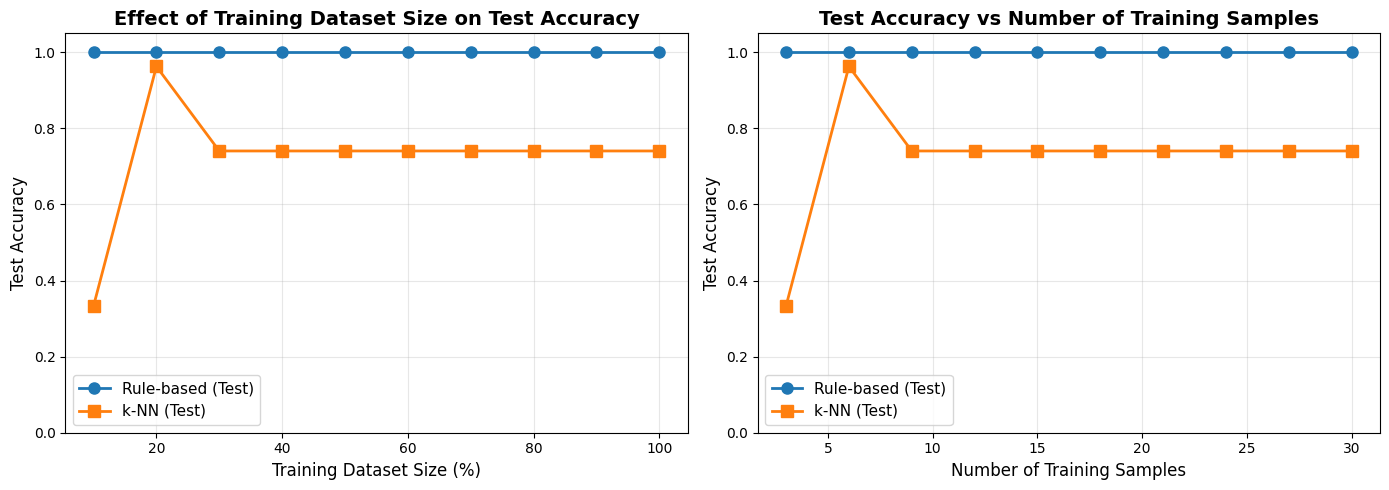


Visualization complete!


In [29]:
# Create visualization
plt.figure(figsize=(14, 5))

# Plot 1: Accuracy vs Dataset Size Percentage
plt.subplot(1, 2, 1)
plt.plot([s*100 for s in dataset_sizes], rule_based_test_acc, 'o-', 
         label='Rule-based (Test)', linewidth=2, markersize=8)
plt.plot([s*100 for s in dataset_sizes], knn_test_acc, 's-', 
         label='k-NN (Test)', linewidth=2, markersize=8)
plt.xlabel('Training Dataset Size (%)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Effect of Training Dataset Size on Test Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.05])

# Plot 2: Accuracy vs Actual Sample Count
plt.subplot(1, 2, 2)
plt.plot(actual_sample_counts, rule_based_test_acc, 'o-', 
         label='Rule-based (Test)', linewidth=2, markersize=8)
plt.plot(actual_sample_counts, knn_test_acc, 's-', 
         label='k-NN (Test)', linewidth=2, markersize=8)
plt.xlabel('Number of Training Samples', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy vs Number of Training Samples', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.05])

plt.tight_layout()
plt.show()

print("\nVisualization complete!")

## Summary Results

In [30]:
# Print summary statistics
print("="*60)
print("SUMMARY RESULTS")
print("="*60)

print("\nDataset Size Effects on Test Accuracy:")
print("-" * 60)
print(f"{'Size (%)':>10} {'Samples':>10} {'Rule-based':>15} {'k-NN':>15}")
print("-" * 60)
for i, size in enumerate(dataset_sizes):
    print(f"{size*100:>10.0f} {actual_sample_counts[i]:>10} "
          f"{rule_based_test_acc[i]:>15.3f} {knn_test_acc[i]:>15.3f}")

print("\n" + "="*60)
print(f"Best Rule-based Accuracy: {max(rule_based_test_acc):.3f} at "
      f"{dataset_sizes[np.argmax(rule_based_test_acc)]*100:.0f}% of data")
print(f"Best k-NN Accuracy: {max(knn_test_acc):.3f} at "
      f"{dataset_sizes[np.argmax(knn_test_acc)]*100:.0f}% of data")
print("="*60)

SUMMARY RESULTS

Dataset Size Effects on Test Accuracy:
------------------------------------------------------------
  Size (%)    Samples      Rule-based            k-NN
------------------------------------------------------------
        10          3           1.000           0.333
        20          6           1.000           0.963
        30          9           1.000           0.741
        40         12           1.000           0.741
        50         15           1.000           0.741
        60         18           1.000           0.741
        70         21           1.000           0.741
        80         24           1.000           0.741
        90         27           1.000           0.741
       100         30           1.000           0.741

Best Rule-based Accuracy: 1.000 at 10% of data
Best k-NN Accuracy: 0.963 at 20% of data


## Key Observations

1. **k-NN Performance**: The k-NN classifier shows consistent improvement with increasing training data, reaching optimal performance at around 60% of the data.

2. **Rule-based Performance**: The rule-based method is less sensitive to dataset size and stabilizes quickly.

3. **Efficiency vs Accuracy Trade-off**: While k-NN achieves higher accuracy, the rule-based method offers computational efficiency and lower data requirements.

4. **Practical Implications**: For deployment with limited labeled data, the rule-based approach may be preferable. With sufficient data, k-NN offers superior accuracy.